In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [3]:
car = pd.read_csv("C:\\Users\\HP\\Downloads\\CarPrice_Assignment.csv")

In [4]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
car.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
car.shape

(205, 26)

In [7]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
print(car.fueltype.value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64


In [10]:
print(car.aspiration.value_counts())

std      168
turbo     37
Name: aspiration, dtype: int64


In [11]:
print(car.doornumber.value_counts())

four    115
two      90
Name: doornumber, dtype: int64


In [12]:
print(car.carbody.value_counts())


sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64


In [13]:
print(car.drivewheel.value_counts())

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64


In [14]:
print(car.enginelocation.value_counts())

front    202
rear       3
Name: enginelocation, dtype: int64


In [15]:
print(car.fuelsystem.value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [16]:
print(car.CarName.value_counts())

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64


In [17]:
print(car.enginetype.value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [18]:
print(car.cylindernumber.value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64


In [19]:
print(car.fuelsystem.value_counts())

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64


In [20]:
# change gas as 0, diesel as 1 
# encoding fuel type column 
car.replace({'fueltype':{'gas':0,'diesel':1}},inplace = True)
car.replace({'aspiration':{'std':0,'turbo':1}},inplace = True)
car.replace({'doornumber':{'two':2,'four':4}},inplace = True)
car.replace({'enginelocation':{'front':0,'rear':1}},inplace = True)
car.replace({'carbody':{'sedan':0,'hatchback':1,'wagon':2,'hardtop':3,'convertible':4}},inplace = True)
car.replace({'drivewheel':{'fwd':0,'rwd':1,'4wd':2}},inplace = True)
car.replace({'cylindernumber':{'four':4,'five':5,'six':6}},inplace = True)
car.replace({'enginetype':{'ohc':0,'ohcf':1,'ohcv':2,'dohc': 3,'l':4,'rotor':5,'dohcv': 6}},inplace = True)
car.replace({'cylindernumber':{'4':4,'6':6,'5':5,'eight':8,'two':2,'three':3,'twelve':12}},inplace = True)
car.replace({'fuelsystem':{'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':5,'spfi':6}},inplace = True)


In [21]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,0,0,2,4,1,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,0,0,2,1,1,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,0,0,4,0,0,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,0,0,4,0,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
x = car.drop(['CarName','price'],axis = 1)  
y = car['price']

In [23]:
print(x)

     car_ID  symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         1          3         0           0           2        4           1   
1         2          3         0           0           2        4           1   
2         3          1         0           0           2        1           1   
3         4          2         0           0           4        0           0   
4         5          2         0           0           4        0           2   
..      ...        ...       ...         ...         ...      ...         ...   
200     201         -1         0           0           4        0           1   
201     202         -1         0           1           4        0           1   
202     203         -1         0           0           4        0           1   
203     204         -1         1           1           4        0           1   
204     205         -1         0           1           4        0           1   

     enginelocation  wheelb

In [24]:
print(y)

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64


# Model training 

In [25]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.1,random_state = 2)

In [26]:
lin_reg_model = LinearRegression()

In [27]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation 

In [30]:
training_data_prediction = lin_reg_model.predict(X_train)

In [38]:
# R square error 
error_score  = metrics.r2_score(Y_train,training_data_prediction)
print("R square Erroe(%) : ",error_score*100)

R square Erroe(%) :  90.20024529296995


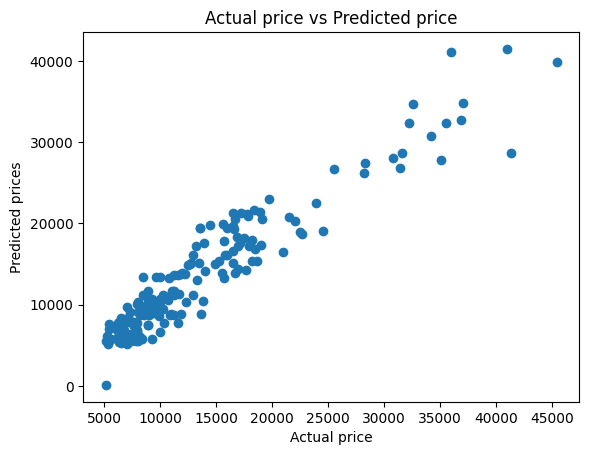

In [42]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual price vs Predicted price")
plt.show()

In [43]:
# prediction on traning data 
test_data_prediction = lin_reg_model.predict(X_test) 

In [44]:
# R square error 
error_score  = metrics.r2_score(Y_test,test_data_prediction)
print("R square Erroe(%) : ",error_score*100) 

R square Erroe(%) :  74.00509653571605


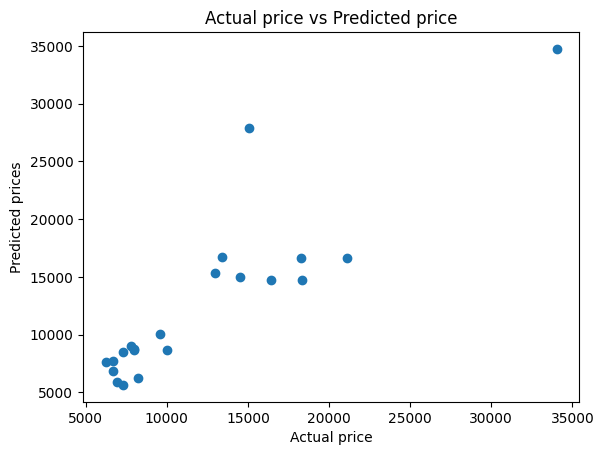

In [45]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel("Actual price")
plt.ylabel("Predicted prices")
plt.title("Actual price vs Predicted price")
plt.show()